<a href="https://colab.research.google.com/github/xinyanLyu/machine-learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Analysis

## Mount GDrive and Import Data

In [1]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import os;os.listdir("/content/gdrive/My Drive/machine learning/Kaggle Titanic")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


load dataset

In [0]:
# import data
import pandas as pd 
import numpy as np 

train_df = pd.read_csv("/content/gdrive/My Drive/machine learning/Kaggle Titanic/train.csv")
test_df    = pd.read_csv("/content/gdrive/My Drive/machine learning/Kaggle Titanic/test.csv")



##Data exploration

###Data descriptive analysis


In [2]:
# preview  data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#  summary train data
train_df.info()

train_df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#  summary test data
test_df.info()

test_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Exploratory visualization

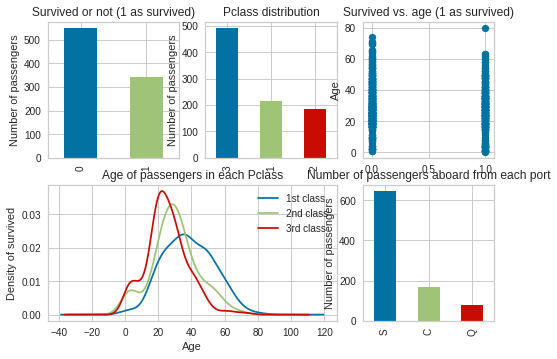

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

plt.subplot2grid((2,3),(0,0))             # plot several charts in one big chart
train_df.Survived.value_counts().plot(kind='bar')# bar chart
plt.title(f"Survived or not (1 as survived)") # title
plt.ylabel(f"Number of passengers")

plt.subplot2grid((2,3),(0,1))
train_df.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"Number of passengers")
plt.title(u"Pclass distribution")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train_df.Survived, train_df.Age)
plt.ylabel(u"Age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"Survived vs. age (1 as survived)")


plt.subplot2grid((2,3),(1,0), colspan=2)
train_df.Age[train_df.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
train_df.Age[train_df.Pclass == 2].plot(kind='kde')
train_df.Age[train_df.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density of survived") 
plt.title(u"Age of passengers in each Pclass")
plt.legend((u'1st class', u'2nd class',u'3rd class'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train_df.Embarked.value_counts().plot(kind='bar')
plt.title(u"Number of passengers aboard from each port")
plt.ylabel(u"Number of passengers")  
plt.show()

####Look deeper into survived vs. some variables that might matter 

##### Survived vs. Pclass

<Figure size 576x396 with 0 Axes>

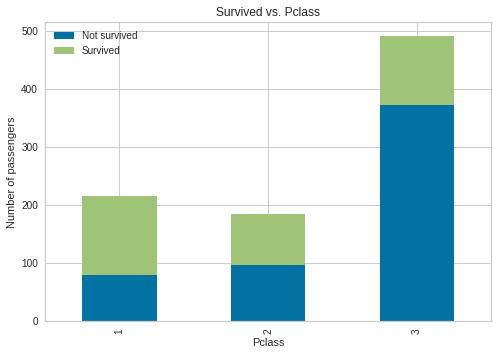

In [20]:
#survived vs. Pclass
fig = plt.figure()
fig.set(alpha=0.2) 

Survived_0 = train_df.Pclass[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Pclass[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. Pclass")
plt.xlabel(u"Pclass") 
plt.ylabel(u"Number of passengers") 

plt.show()

#####survived vs. port

<Figure size 576x396 with 0 Axes>

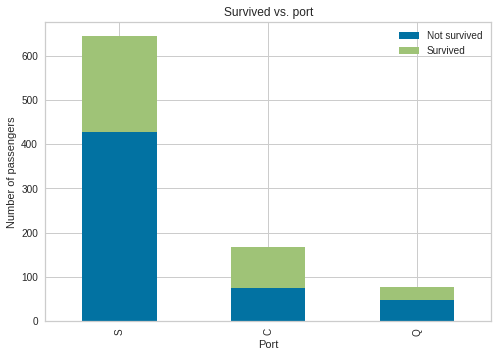

In [21]:
#survived vs. port
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = train_df.Embarked[train_df.Survived == 0].value_counts()
Survived_1 = train_df.Embarked[train_df.Survived == 1].value_counts()
df=pd.DataFrame({u'Survived':Survived_1, u'Not survived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. port")
plt.xlabel(u"Port") 
plt.ylabel(u"Number of passengers") 

plt.show()

#####survived vs. gender

<Figure size 576x396 with 0 Axes>

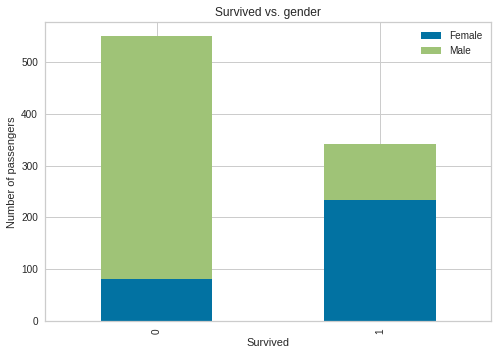

In [23]:
#survived vs. gender
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = train_df.Survived[train_df.Sex == 'male'].value_counts()
Survived_f = train_df.Survived[train_df.Sex == 'female'].value_counts()
df=pd.DataFrame({u'Male':Survived_m, u'Female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"Survived vs. gender")
plt.xlabel(u"Survived") 
plt.ylabel(u"Number of passengers")
plt.show()

#####Sibsp and parch

In [41]:
#siblings
g = train_df.groupby(['SibSp','Survived'])
df_sib = pd.DataFrame(g.count()['PassengerId'])
df_sib

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [42]:
#parch
g = train_df.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df


PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

#####gender in each class

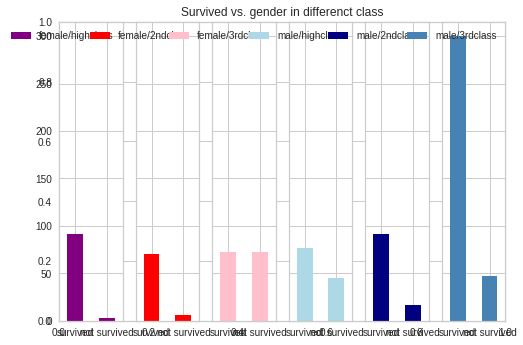

In [40]:
#Survived vs. gender in differenct class
fig=plt.figure()
fig.set(alpha=0.65) 
plt.title(u"Survived vs. gender in differenct class")

ax1=fig.add_subplot(161)
train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 1].value_counts().plot(kind='bar', label="female high class", color='purple')
ax1.set_xticklabels([u"survived", u"not survived"], rotation=0)
ax1.legend([u"female/highclass"], loc='best')

ax2=fig.add_subplot(162, sharey=ax1)
train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 2].value_counts().plot(kind='bar', label='female, 2nd class', color='red')
ax2.set_xticklabels([u"survived", u"not survived"], rotation=0)
plt.legend([u"female/2ndclass"], loc='best')

ax3=fig.add_subplot(163, sharey=ax1)
train_df.Survived[train_df.Sex == 'female'][train_df.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax3.set_xticklabels([u"survived", u"not survived"], rotation=0)
plt.legend([u"female/3rdclass"], loc='best')

ax3=fig.add_subplot(164, sharey=ax1)
train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 1].value_counts().plot(kind='bar', label='male, 1st class',color='lightblue')
ax3.set_xticklabels([u"survived", u"not survived"], rotation=0)
plt.legend([u"male/highclass"], loc='best')

ax4=fig.add_subplot(165, sharey=ax1)
train_df.Survived[train_df.Sex == 'male'][train_df.Pclass ==2].value_counts().plot(kind='bar', label='male 2nd class', color='navy')
ax4.set_xticklabels([u"survived", u"not survived"], rotation=0)
plt.legend([u"male/2ndclass"], loc='best')

ax5=fig.add_subplot(166, sharey=ax1)
train_df.Survived[train_df.Sex == 'male'][train_df.Pclass == 3].value_counts().plot(kind='bar', label='male 3rd class', color='steelblue')
ax5.set_xticklabels([u"survived", u"not survived"], rotation=0)
plt.legend([u"male/3rdclass"], loc='best')

plt.show()

#####cabin and ticket
Since carbin and ticket have multiple unique values, so we can not using them directly.

Survived rates of passengers groups with/without Cabin information display different pattern.

<Figure size 576x396 with 0 Axes>

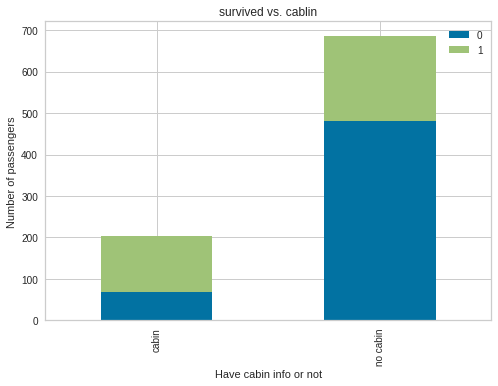

In [46]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train_df.Survived[pd.notnull(train_df.Cabin)].value_counts()
Survived_nocabin = train_df.Survived[pd.isnull(train_df.Cabin)].value_counts()
df=pd.DataFrame({u'cabin':Survived_cabin, u'no cabin':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"survived vs. cablin")
plt.xlabel(u"Have cabin info or not") 
plt.ylabel(u"Number of passengers")
plt.show()

## Data cleaning and Feature engineering
deal with NA and catogorize some variables

###Fit age
To fit the missing age, we use RandomForest in scikit-learn package.

In [0]:
from sklearn.ensemble import RandomForestRegressor
 
### Use RandomForestClassifier impute missing age data
def set_missing_ages(df):
    
   
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]    # Put numerical variables we have into Random Forest Regressor

    known_age = age_df[age_df.Age.notnull()].as_matrix()       # Divide passengers in to two group(known_age/unknown_age)
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    y = known_age[:, 0]  # y -age
    X = known_age[:, 1:] # X- features of known_age group

    # fit into RandomForestRegressor
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # predict age for unknown_age group
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # impute
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr



### Deal with NAs in Cabin
Devide Cabin into 2 groups, and  assign 'Y'/ 'N'  .

In [0]:
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df


### Get new train data

In [13]:

train_df, rfr = set_missing_ages(train_df)
train_df = set_Cabin_type(train_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


### Create dummy and get new train dataset

create dummies for catogorical variables

In [15]:
dummies_Cabin = pd.get_dummies(train_df['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train_df['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train_df['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train_df['Pclass'], prefix= 'Pclass')

newtrain_df = pd.concat([train_df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
newtrain_df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
newtrain_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


###Correlation

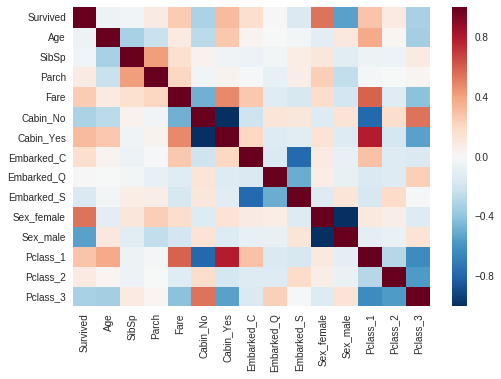

In [17]:
import seaborn as sns
sns.heatmap(newtrain_df.iloc[:,1:].corr())

##Build Logistic Regression model with scikit-learn package

###Extract features from new train dataset, and transform into numpy

In [0]:
from sklearn import linear_model

modify_train_df = newtrain_df.filter(regex='Survived|Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = modify_train_df.as_matrix()

# y is target(survived)#
y = train_np[:, 0]

# X is features 
X = train_np[:, 1:]


In [33]:
modify_train_df.head(3)

,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1


###Train logistic model

In [34]:

# fit into RandomForestRegressor
clf = linear_model.LogisticRegression(C=1.0, multi_class='ovr', penalty='l1',  solver='liblinear',tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=1e-06, verbose=0, warm_start=False)

In [35]:
X.shape

(891, 14)

###Deal with test dataset

####Feature transformation with test data

In [36]:
test_df.loc[ (test_df.Fare.isnull()), 'Fare' ] = 0

# impute missing age
tmp_df = test_df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test_df.Age.isnull()].as_matrix()

X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test_df.loc[ (test_df.Age.isnull()), 'Age' ] = predictedAges

# create dummies
test_df = set_Cabin_type(test_df)
dummies_Cabin = pd.get_dummies(test_df['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_df['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_df['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_df['Pclass'], prefix= 'Pclass')


df_test = pd.concat([test_df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test.head(5)

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1


###Use test data for prediction

In [0]:
test = df_test.filter(regex='Age|SibSp|Parch|Fare|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':test_df['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [0]:
pd.read_csv("logistic_regression_predictions.csv")

##Save submission file

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Create & upload a text file.
#你想要导出的文件的名字
uploaded = drive.CreateFile({'title': 'logistic_regression_predictions.csv'})

